# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.100969e+01     6.505458e+00
 * time: 0.0028531551361083984
     1     2.911636e+01     5.080600e+00
 * time: 0.012593984603881836
     2     2.126492e+01     4.871682e+00
 * time: 0.02465510368347168
     3     1.500573e+01     3.830772e+00
 * time: 0.03672599792480469
     4     1.193440e+01     1.692957e+00
 * time: 0.04877614974975586
     5     1.065848e+01     2.212612e+00
 * time: 0.05855417251586914
     6     9.983620e+00     1.596575e+00
 * time: 0.06836509704589844
     7     9.316071e+00     1.248278e+00
 * time: 0.07837915420532227
     8     8.741080e+00     1.356386e+00
 * time: 0.08819913864135742
     9     8.395172e+00     1.027898e+00
 * time: 0.09794116020202637
    10     8.249542e+00     6.906889e-01
 * time: 0.10777401924133301
    11     8.118424e+00     6.983577e-01
 * time: 0.11760711669921875
    12     8.005685e+00     4.578327e-01
 * time: 0.12746715545654297
    13     7.948452e+00     5.974740e-01
 * ti

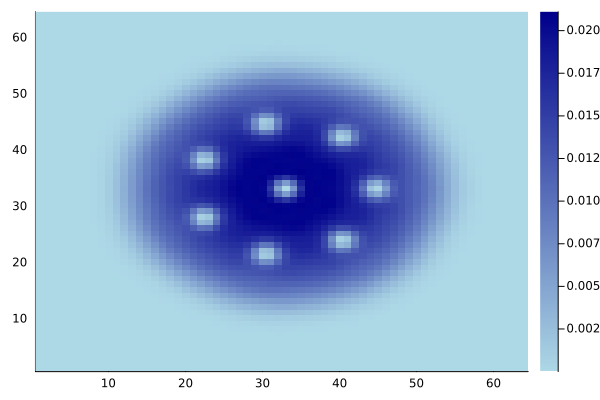

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)